Analyze state factors (in train dataset)

In [1]:
import json
import torch

with open("/data/flybyml_dataset_v1/split/train.json", "r") as f:
    ids = json.load(f)

sensory_observations = []
actions = []

for id in ids:
    with open(f"/data/flybyml_dataset_v1/data/{id}.json", "r") as f:
        data = json.load(f)
    
    
    for datum in data:
        sensory_observations.append(torch.tensor([
            *datum['state']['attitude'][:2], 
            datum['state']['speed'], 
            datum['state']['vertical_speed']
        ]))

        # construct actions
        # normalize all values ranging from 0 to 1
        actions.append(torch.tensor([
            (datum['control']['elevator'] + 1) / 2,
            (datum['control']['aileron'] + 1) / 2,
            datum['control']['thrust'],
        ]))
        
err = [
    sensory_observations[idx] - sensory_observations[idx - 1] for idx in range(1, len(sensory_observations))
]
sensory_observations.pop(0)

tensor([  7.3402,  -1.3626, 104.0277,   1.2507])

In [2]:
assert len(err), len(sensory_observations)
assert (sensory_observations[11] - sensory_observations[10])[0], err[10][0]

print(len(sensory_observations))

77276


In [3]:
x = [torch.cat((sensory_observations[idx], err[idx])) for idx in range(len(sensory_observations))]
print(len(x))

77276


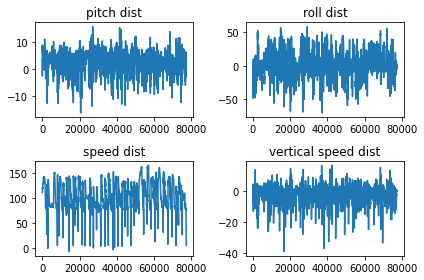

In [4]:
import matplotlib.pyplot as plt

x_tensor = torch.stack(x)
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(x_tensor[:, 0])
ax[0, 0].set_title("pitch dist")

ax[0, 1].plot(x_tensor[:, 1])
ax[0, 1].set_title("roll dist")

ax[1, 0].plot(x_tensor[:, 2])
ax[1, 0].set_title("speed dist")

ax[1, 1].plot(x_tensor[:, 3])
ax[1, 1].set_title("vertical speed dist")

fig.tight_layout()
plt.show()

In [5]:
import numpy as np

for idx, val in enumerate(["pitch", "roll", "speed", "vertical speed"]):
    t = x_tensor[:, idx].numpy()
    print("=========={val}============")
    print(f"min: {np.min(t)}")
    print(f"max: {np.max(t)}")
    print(f"mean: {np.mean(t)}")
    print(f"stdev: {np.std(t)}")

=========={val}============
min: -16.217012405395508
max: 15.650435447692871
mean: 2.1235454082489014
stdev: 3.1076838970184326
=========={val}============
min: -70.77903747558594
max: 58.61531448364258
mean: -0.1907942295074463
stdev: 15.886574745178223
=========={val}============
min: -6.358720779418945
max: 165.82044982910156
mean: 104.84984588623047
stdev: 25.880767822265625
=========={val}============
min: -39.197200775146484
max: 16.543439865112305
mean: -2.7765467166900635
stdev: 4.741880893707275
